# United States - Macroeconomic Analysis

## Fed Funds Rate Projections

The **Fed Funds Rate** is the the target interest rate range set by the Federal Open Market Committee (FOMC) at which despository institutions (e.g. commerical banks, credit unions, ... ) borrow and lend their excess reserves to each other overnight (on an uncollateralised basis).

The **FOMC**, which is the policymaking body of the Federal Reserve System, meets **eight times a year** to set the target federal funds rate, which is part of its monetary policy. This is used to help promote economic growth.

The below displays the latest **Fed Funds rate projections** from the participants of the **Sept 2023** FOMC meeting (last meeting associated with a summary of projections), where the data is extracted from the meeting minutes available on the Fed's wesbite.

In [270]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns

In [271]:
# Input URL: https://www.federalreserve.gov/monetarypolicy/fomcprojtabl20230920.htm
url = 'https://www.federalreserve.gov/monetarypolicy/fomcprojtabl20230920.htm'
response = requests.get(url)

# Parse HTML into BeautifulSoup object
soup = BeautifulSoup(response.content, 'html.parser')

# Find table in div which contains the text "Figure 3.E" in the h4 tag
divs = soup.find_all('div')
div, = list(filter(lambda div: div.find('h4') is not None and "Figure 3.E" in div.find('h4').text, divs))
table = div.find('table')

# Convert html table into dataframe
projected_rates = pd.read_html(StringIO(table.decode()))[0]

# Sum all values in columns
target_rng = rates_as_reported.columns.tolist()[1:-1]

# Clean and transpose dataframe dataframe
projected_rates = projected_rates.astype(str)
projected_rates = projected_rates.T

# Restructure columns and rows
projected_rates.columns = projected_rates.iloc[0]
projected_rates = projected_rates.iloc[1:]

# Rename column to single name
projected_rates.columns.names=['Percent Range']

# Reformat values 
projected_rates = projected_rates.replace('nan','0')
projected_rates = projected_rates.replace(r'\.0$', '', regex=True)

# Convert values to int
projected_rates[projected_rates.columns[0:]] = projected_rates[projected_rates.columns[0:]].astype(int)

In [272]:
projected_rates

Percent Range                     2.13 - 2.37  2.38 - 2.62  2.63 - 2.87  \
2023       June projections                 0            0            0   
           September projections            0            0            0   
2024       June projections                 0            0            0   
           September projections            0            0            0   
2025       June projections                 0            1            2   
           September projections            0            0            1   
2026       September projections            0            4            5   
Longer Run June projections                 0           11            3   
           September projections            0           12            1   

Percent Range                     2.88 - 3.12  3.13 - 3.37  3.38 - 3.62  \
2023       June projections                 0            0            0   
           September projections            0            0            0   
2024       June projections                 0            0            0   
           September projections            0            0            0   
2025       June projections                 1            3            3   
           September projections            1            1            3   
2026       September projections            2            2            0   
Longer Run June projections                 1            1            0   
           September projections            1            1            1   

Percent Range                     3.63 - 3.87  3.88 - 4.12  4.13 - 4.37  \
2023       June projections                 0            0            0   
           September projections            0            0            0   
2024       June projections                 1            0            1   
           September projections            0            0            0   
2025       June projections                 2            1            2   
           September projections            3            2            3   
2026       September projections            0            1            2   
Longer Run June projections                 1            0            0   
           September projections            2            0            0   

Percent Range                     4.38 - 4.62  4.63 - 4.87  4.88 - 5.12  \
2023       June projections                 0            0            0   
           September projections            0            0            0   
2024       June projections                 6            2            2   
           September projections            2            3            4   
2025       June projections                 0            1            1   
           September projections            0            1            1   
2026       September projections            0            1            2   
Longer Run June projections                 0            0            0   
           September projections            0            0            0   

Percent Range                     5.13 - 5.37  5.38 - 5.62  5.63 - 5.87  \
2023       June projections                 2            4            9   
           September projections            0            7           12   
2024       June projections                 3            0            2   
           September projections            4            4            1   
2025       June projections                 0            0            1   
           September projections            1            1            1   
2026       September projections            0            0            0   
Longer Run June projections                 0            0            0   
           September projections            0            0            0   

Percent Range                     5.88 - 6.12  6.13 - 6.37  
2023       June projections                 2            1  
           September projections            0            0  
2024       June projections                 1            0  
 

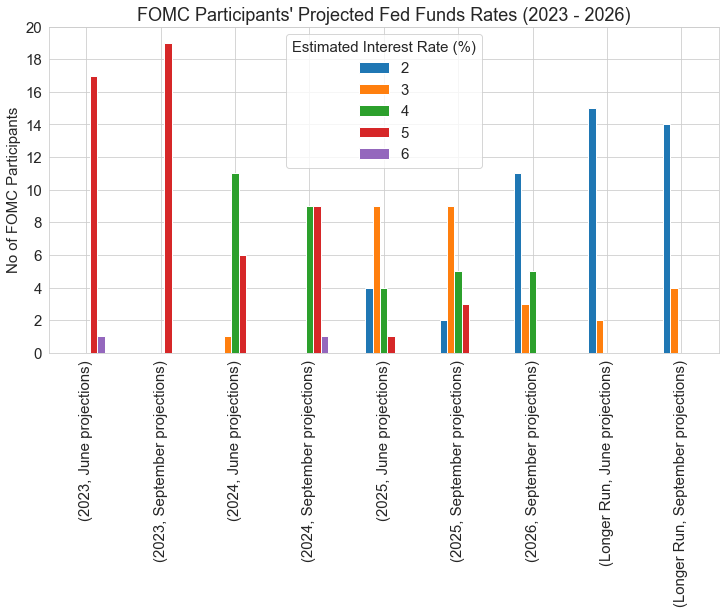

In [280]:
# Create another projected rates df
projected_rates_raw = pd.read_html(StringIO(table.decode()))[0]

# Create rounded range column
projected_rates_raw['Range Rounded'] = projected_rates_raw['Percent Range'].apply(lambda x: x.iloc[0].split('.')[0], axis=1)

# Group and sum columns
cols = projected_rates_raw.columns.tolist()[1:-1]
projected_rates_round = projected_rates_raw.groupby('Range Rounded')[cols].sum(numeric_only=True).reset_index()

# Restructure columns and rows
projected_rates_round.rename(columns={'Range Rounded': 'Percent Range'}, inplace=True)
projected_rates_round = projected_rates_round.astype(int)
projected_rates_round = projected_rates_round.T

# Reformat 1st row as column name
projected_rates_round.columns = projected_rates_round.iloc[0]
projected_rates_round = projected_rates_round.iloc[1:]

# Plot bar chart
projected_rates_round.columns.names=['Estimated Interest Rate (%)']
projected_rates_round.plot(kind="bar",title="Projected Rates by FOMC Participants",figsize=(12,6))
plt.title("FOMC Participants' Projected Fed Funds Rates (2023 - 2026)", fontsize=18)
plt.yticks(np.arange(0,22,2), np.arange(0,22,2));
plt.ylabel("No of FOMC Participants", fontsize=15);
plt.xticks(fontsize = 15);
plt.rc('axes', labelsize=10);

## US Economic Indicators

In [281]:
from fredapi import Fred

In [282]:
fred = Fred(api_key='bcaac7c37b33b8b2cb87708705e93fbb')

In [283]:
start_date = '2000-01-01'
end_date = '2023-11-22'

In [284]:
# The 10-year minus 2-year Treasury (constant maturity) yields: Positive values may imply future growth, negative values may imply economic downturns.
twostens = pd.DataFrame(fred.get_series(('T10Y2Y'),observation_start=start_date, observation_end=end_date)).resample("M").mean()

# Effective Federal Funds Rate, or the interest rate depository institutions charge each other for overnight loans of funds.
#fedfunds = 


In [285]:
twostens

,0
2000-01-31,0.221000
2000-02-29,-0.091000
2000-03-31,-0.271739
2000-04-30,-0.413158
2000-05-31,-0.369091
...,...
2023-07-31,-0.929000
2023-08-31,-0.733913
2023-09-30,-0.643000
2023-10-31,-0.269524
